# Latar Belakang
Sebuah perusahaan yang bergerak di bidang data, ingin merekrut *data scientist*. Perusahaan ini melakukan pelatihan dan melakukan perekrutan ke orang-orang yang berhasil menyelesaikan pelatihan tersebut. Banyak orang mendaftar ke pelatihan tersebut, tapi tidak semua yang ikut pelatihan berniat untuk pindah pekerjaan.   


## Pernyataan Masalah
Perusahaan ingin mengetahui **kandidat mana saja yang ingin bekerja di perusahaan mereka setelah training atau sedang mencari pekerjaan baru**. Informasi ini akan membantu perusahaan untuk mengurangi ongkos dan waktu training, meningkatkan kualitas dan membantu dalam mengelompokkan kandidat dalam training. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik kandidat yang ingin pindah pekerjaan, terutama dibandingkan peserta yang tidak ingin pindah bekerja?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N). 

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait vendor dan waktu perjalanan, lokasi perjalanan, karakteristik penumpang, karakteristik perjalanan, biaya perjalanan, informasi pembayaran, dan informasi teknis. Ada 20 kolom di dalam dataset New York City TLC Trip, yaitu: 
 

| **Field Name**               | **Description**                                                                                       |
|------------------------------|-------------------------------------------------------------------------------------------------------|
| **VendorID**                  | A code indicating the LPEP provider that provided the record. <br> `1 = Creative Mobile Technologies, LLC` <br> `2 = VeriFone Inc.` |
| **lpep_pickup_datetime**      | The date and time when the meter was engaged.                                                         |
| **lpep_dropoff_datetime**     | The date and time when the meter was disengaged.                                                      |
| **Passenger_count**           | The number of passengers in the vehicle. This is a driver-entered value.                              |
| **Trip_distance**             | The elapsed trip distance in miles as reported by the taximeter.                                      |
| **PULocationID**              | TLC Taxi Zone in which the taximeter was engaged (pickup location).                                   |
| **DOLocationID**              | TLC Taxi Zone in which the taximeter was disengaged (dropoff location).                               |
| **RateCodeID**                | The final rate code in effect at the end of the trip. <br> `1 = Standard rate` <br> `2 = JFK` <br> `3 = Newark` <br> `4 = Nassau or Westchester` <br> `5 = Negotiated fare` <br> `6 = Group ride` |
| **Store_and_fwd_flag**        | Indicates whether the trip record was held in vehicle memory before sending to the vendor. <br> `Y = Store and forward trip` <br> `N = Not a store and forward trip` |
| **Payment_type**              | A numeric code signifying how the passenger paid for the trip. <br> `1 = Credit card` <br> `2 = Cash` <br> `3 = No charge` <br> `4 = Dispute` <br> `5 = Unknown` <br> `6 = Voided trip` |
| **Fare_amount**               | The time-and-distance fare calculated by the meter. This includes extra miscellaneous extras and surcharges. |
| **MTA_tax**                   | $0.50 MTA tax that is automatically triggered based on the metered rate in use.                       |
| **Improvement_surcharge**     | $0.30 improvement surcharge assessed on hailed trips at the flag drop. The surcharge began in 2015.   |
| **Tip_amount**                | Credit card tips (automatically populated). Cash tips are not included.                               |
| **Tolls_amount**              | The total amount of all tolls paid in the trip.                                                       |
| **Total_amount**              | The total amount charged to passengers. Does not include cash tips.                                   |
| **Trip_type**                 | A code indicating whether the trip was a street-hail or a dispatch. <br> `1 = Street-hail` <br> `2 = Dispatch` |

Jika di bahasa Indonesia kan akan seperti dibawah ini: 

| **Nama Kolom**                | **Deskripsi**                                                                                         |
|-------------------------------|-------------------------------------------------------------------------------------------------------|
| **VendorID**                  | Kode yang menunjukkan penyedia LPEP yang menyediakan data ini. <br> `1 = Creative Mobile Technologies, LLC` <br> `2 = VeriFone Inc.` |
| **lpep_pickup_datetime**      | Tanggal dan waktu ketika argo mulai diaktifkan.                                                        |
| **lpep_dropoff_datetime**     | Tanggal dan waktu ketika argo dinonaktifkan.                                                           |
| **Passenger_count**           | Jumlah penumpang dalam kendaraan. Ini adalah nilai yang dimasukkan oleh pengemudi.                     |
| **Trip_distance**             | Jarak perjalanan yang dilaporkan oleh argo dalam mil.                                                  |
| **PULocationID**              | Zona taksi TLC di mana argo diaktifkan (lokasi penjemputan).                                           |
| **DOLocationID**              | Zona taksi TLC di mana argo dinonaktifkan (lokasi pengantaran).                                        |
| **RateCodeID**                | Kode tarif yang berlaku pada akhir perjalanan. <br> `1 = Tarif Standar` <br> `2 = JFK` <br> `3 = Newark` <br> `4 = Nassau atau Westchester` <br> `5 = Tarif Negosiasi` <br> `6 = Perjalanan Kelompok` |
| **Store_and_fwd_flag**        | Menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirim ke penyedia. <br> `Y = Perjalanan simpan dan teruskan` <br> `N = Bukan perjalanan simpan dan teruskan` |
| **Payment_type**              | Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan. <br> `1 = Kartu kredit` <br> `2 = Tunai` <br> `3 = Tanpa biaya` <br> `4 = Sengketa` <br> `5 = Tidak diketahui` <br> `6 = Perjalanan dibatalkan` |
| **Fare_amount**               | Tarif perjalanan berdasarkan waktu dan jarak yang dihitung oleh argo, termasuk biaya tambahan dan surcharge. |
| **MTA_tax**                   | Pajak MTA sebesar $0,50 yang secara otomatis dipicu berdasarkan tarif argo yang digunakan.             |
| **Improvement_surcharge**     | Surcharge peningkatan sebesar $0,30 yang dikenakan pada perjalanan yang dimulai sejak 2015.            |
| **Tip_amount**                | Tips kartu kredit yang diisi secara otomatis. Tips tunai tidak termasuk.                              |
| **Tolls_amount**              | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                             |
| **Total_amount**              | Jumlah total yang dibebankan kepada penumpang, tidak termasuk tips tunai.                             |
| **Trip_type**                 | Kode yang menunjukkan apakah perjalanan adalah street-hail atau dispatch. <br> `1 = Street-hail` <br> `2 = Dispatch` |


In [228]:
df = pd.read_csv('nyc_tlc_trip_record.csv')
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi nama kolom, nilai dan tipe data dari dari dataset.

In [229]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

Langkah berikutnya adalah melakukan identifikasi terhadap nilai-nilai unik yang terdapat di masing-masing kolom.

In [230]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [231]:
tabel1Desc.to_csv('data_unique_value.txt', sep='|', index=False)

## Kesimpulan Umum

Secara umum, kita bisa melihat bahwa:

* Dataset memiliki **19 kolom** dan **66.575 baris**.
* Beberapa kolom memiliki nilai kosong (`NaN`), yaitu: 
  - `store_and_fwd_flag`
  - `RatecodeID`
  - `passenger_count`
  - `ehail_fee`
  - `payment_type`
  - `trip_type`
  - `congestion_surcharge`

* Kolom `ehail_fee` seluruh nilainya `NaN`, sehingga tidak berguna untuk analisis dan bisa dihapus.
* Kolom `VendorID` hanya memiliki 2 nilai unik, kemungkinan merepresentasikan dua perusahaan taksi.
* Kolom waktu seperti `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki nilai unik yang sangat banyak, merepresentasikan waktu perjalanan. Bisa dikembangkan menjadi fitur baru seperti `pickup_hour`, `pickup_day`, dsb.
* Kolom `store_and_fwd_flag` berisi nilai 'Y' dan 'N'. Nilai `NaN` di sini bisa dipertimbangkan sebagai 'N' (tidak diforward).
* Kolom `RatecodeID`, `payment_type`, dan `trip_type` adalah **data kategorik numerik** dan mengandung `NaN`, bisa dilakukan imputasi atau dikelompokkan sebagai kategori 'unknown'.
* Kolom `PULocationID` dan `DOLocationID` masing-masing memiliki 226 dan 249 nilai unik. Ini merupakan ID lokasi penjemputan dan pengantaran.
* Kolom `passenger_count` memiliki nilai dari 0 hingga 9. Nilai 0 kemungkinan error input dan perlu ditelusuri.
* Kolom `trip_distance`, `fare_amount`, `tip_amount`, `total_amount`, dsb adalah **kolom numerik kontinu** yang bisa digunakan untuk analisis distribusi dan korelasi.
* Terdapat beberapa **nilai yang tidak wajar atau negatif** seperti pada kolom `extra`, `mta_tax`, `improvement_surcharge`, dan `congestion_surcharge`. Perlu dibersihkan lebih lanjut.
* Kolom `total_amount` merupakan variabel target potensial jika ingin melakukan prediksi biaya perjalanan.

### Missing Value

In [232]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

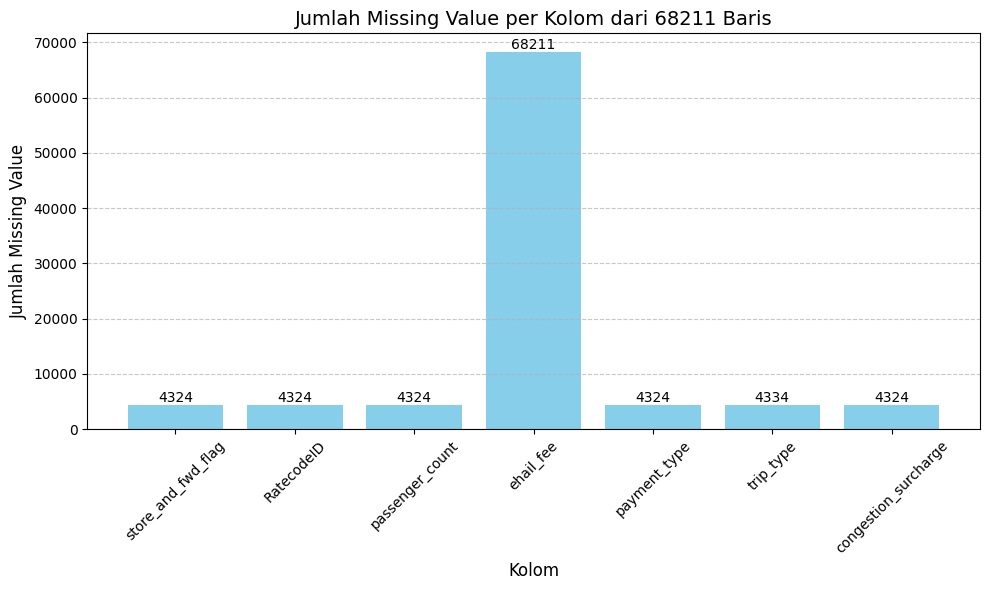

In [233]:
# Sebaran missing value di dalam data
kolom_na = [
    'store_and_fwd_flag',
    'RatecodeID',
    'passenger_count',
    'ehail_fee',
    'payment_type',
    'trip_type',
    'congestion_surcharge'
]

# Hitung jumlah missing value untuk setiap kolom yang dipilih
missing_counts = df[kolom_na].isna().sum()
total_rows = df.shape[0]

# Buat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_counts.index, missing_counts.values, color='skyblue')

# Tambahkan label angka di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 50,  # Atur jarak label dari batang
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Atur tampilan plot
plt.title(f"Jumlah Missing Value per Kolom dari {total_rows} Baris", fontsize=14)
plt.xlabel("Kolom", fontsize=12)
plt.ylabel("Jumlah Missing Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Penanganan Missing Value

Secara garis besar, *missing value* pada kolom `ehail_fee`, `trip_type`, `congestion_surcharge`, `payment_type`, `RatecodeID`, dan `passenger_count` memiliki proporsi yang cukup bervariasi, dengan kolom `ehail_fee` merupakan yang paling banyak kosong, mencapai hampir 100% dari data.

Untuk menangani *missing value*:

1. **Menghapus kolom yang memiliki *missing value* hampir seluruhnya**, yaitu pada kolom `ehail_fee`, karena kolom tersebut tidak memberikan informasi yang berarti.

2. **Menghapus baris yang memiliki *missing value* pada kolom lainnya**, karena proporsinya tidak melebihi 10% dari total data. Mengingat total data yang tersedia cukup besar, yaitu lebih dari 60.000 baris, maka penghapusan baris ini dianggap tidak berdampak signifikan terhadap kualitas data.


In [234]:
# 1. Menghapus kolom 'ehail_fee' karena hampir seluruh datanya kosong
df.drop(columns=["ehail_fee"], inplace=True)

In [235]:
# 2. Menghapus baris yang memiliki missing value di kolom lain
# karena total missing value < 10% dan data cukup besar (> 60.000)
df.dropna(inplace=True)

### Penjelasan Fungsi Kolom dan Alasan Penghapusan Baris dengan Missing Value

Untuk menangani *missing value* pada dataset, perlu dipahami terlebih dahulu fungsi dari masing-masing kolom yang memiliki nilai kosong, serta alasan mengapa baris-baris dengan nilai kosong tersebut lebih baik dihapus daripada diisi secara otomatis (imputasi):

---

#### 1. `trip_type`
- **Fungsi:** Menunjukkan jenis perjalanan (misalnya: reguler, disewa).
- **Alasan:** Nilai ini bersifat kategorikal dan tidak bisa diasumsikan. Mengisi secara acak atau dengan modus dapat menyebabkan distorsi informasi perilaku perjalanan.

#### 2. `congestion_surcharge`
- **Fungsi:** Biaya tambahan karena kemacetan, biasanya tergantung pada waktu dan lokasi.
- **Alasan:** Data numerik ini sangat bervariasi tergantung konteks. Mengisi dengan nilai rata-rata atau median bisa merusak representasi biaya sebenarnya.

#### 3. `payment_type`
- **Fungsi:** Menunjukkan metode pembayaran yang digunakan (tunai, kartu kredit, dll).
- **Alasan:** Informasi ini penting untuk analisis perilaku pengguna. Imputasi dapat menyebabkan ketidaktepatan dalam memahami pola pembayaran.

#### 4. `RatecodeID`
- **Fungsi:** Menyatakan jenis tarif yang digunakan (misalnya tarif standar, bandara, tarif khusus).
- **Alasan:** Memiliki pengaruh terhadap total tarif perjalanan. Mengisi nilai sembarang bisa menyebabkan bias dalam analisis biaya.

#### 5. `passenger_count`
- **Fungsi:** Jumlah penumpang dalam satu perjalanan.
- **Alasan:** Nilai ini numerik, tetapi sangat tergantung pada konteks. Mengisi dengan nilai default (misalnya 1 atau modus) bisa menyesatkan analisis terkait kapasitas dan pola pemesanan.

#### 6. `store_and_fwd_flag`
- **Fungsi:** Menunjukkan apakah data perjalanan disimpan sementara di perangkat karena tidak ada sinyal, lalu dikirim ke server kemudian. Nilai umum: `'Y'` (ya) atau `'N'` (tidak).
- **Alasan:** 
  - *Missing value* bisa disebabkan oleh gangguan sinyal, error perangkat, atau data historis yang tidak mencatat nilai ini.
  - Jika proporsi `null` kecil, sebaiknya hapus baris karena pengisian dengan `'N'` atau `'Y'` bisa menimbulkan asumsi yang tidak valid.
  - Jika proporsi besar dan kolom ini tidak penting untuk analisis utama, bisa dipertimbangkan untuk dihapus sepenuhnya.

---

### Kesimpulan

Karena sebagian besar kolom di atas bersifat **kategorikal atau numerik yang sangat kontekstual**, maka melakukan **imputasi** berisiko tinggi menyebabkan bias dan mengganggu kualitas analisis. Oleh karena itu, **penghapusan baris dengan *missing value*** dipilih sebagai strategi terbaik, terutama karena total data sangat besar (> 60.000 baris) dan proporsi *missing value* masih dalam batas wajar (kurang dari 10%).

In [236]:
# Cek hasil akhir
print("Jumlah baris setelah penanganan missing value:", len(df))
print("Missing value tersisa:\n", df.isnull().sum())

Jumlah baris setelah penanganan missing value: 63877
Missing value tersisa:
 VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


In [237]:
listItem = []
for col in df.columns:
    unique_vals = df[col].unique()
    sample_vals = ", ".join([str(val) for val in unique_vals[:5]])  # gabung jadi string
    listItem.append([col, len(unique_vals), sample_vals])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                         data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"2, 1"
1,lpep_pickup_datetime,62665,"2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04"
2,lpep_dropoff_datetime,62602,"2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02"
3,store_and_fwd_flag,2,"N, Y"
4,RatecodeID,5,"1.0, 5.0, 4.0, 3.0, 2.0"
5,PULocationID,222,"166, 24, 223, 41, 181"
6,DOLocationID,248,"143, 43, 179, 238, 74"
7,passenger_count,10,"1.0, 2.0, 4.0, 3.0, 6.0"
8,trip_distance,1727,"2.58, 1.81, 0.0, 1.3, 1.1"
9,fare_amount,463,"14.9, 10.7, 7.2, 6.5, 6.0"


In [238]:
tabelDesc.to_csv('data_remove_null.txt', sep='|', index=False)

### Pengubahan Type data atau Format data

Konversi Format Tanggal

In [239]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

Konversi Kolom Numerik ke Float

In [240]:
float_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge'
]

for col in float_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Kenapa dilakukan Transformasi atau Formating Data

### 1. Konversi Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` ke Tipe Datetime

- **Kenapa?** Data waktu dalam format string tidak bisa digunakan langsung untuk analisis waktu (seperti durasi, hari, jam sibuk, dsb).
- **Manfaat:** Memungkinkan kita melakukan manipulasi seperti menghitung durasi perjalanan, ekstraksi hari/tanggal, dan pengelompokan berdasarkan waktu.

---

### 2. Konversi Kolom Numerik ke Tipe Float

- **Kolom:**  `passenger_count`, `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`
- **Kenapa?** Terkadang saat membaca data, angka dikenali sebagai string. Ini menghambat operasi matematis seperti agregasi, visualisasi, dan perhitungan lainnya.
- **Manfaat:** Data numerik akan bisa diproses untuk rata-rata, total, distribusi, dan model machine learning jika diperlukan.

---



### Cek apakah ada nilai negatif

In [241]:
(df.select_dtypes(include='number') < 0).sum()

VendorID                   0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount              171
extra                     80
mta_tax                  165
tip_amount                 9
tolls_amount               0
improvement_surcharge    174
total_amount             174
payment_type               0
trip_type                  0
congestion_surcharge       3
dtype: int64

In [242]:
non_negative_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_distance'
]

# Filter hanya baris yang TIDAK mengandung nilai negatif di kolom-kolom tersebut
df = df[(df[non_negative_cols] >= 0).all(axis=1)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


## Kenapa Nilai Negatif Tidak Masuk Akal

- **Kolom:** `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`, `trip_distance`
- **Kenapa?** Nilai seperti total_amount atau fare_amount **tidak seharusnya negatif**. Negatif bisa berasal dari error input, bug, atau kesalahan sistem.
- **Penanganan?** Karena jumlah baris dengan nilai negatif di kolom-kolom tersebut sangat sedikit (sekitar 100 baris) dari total dataset, maka baris-baris tersebut dihapus.
- **Manfaat:** Menghindari hasil analisis yang tidak masuk akal (misalnya, total pembayaran negatif atau jarak -2 km).

In [243]:
(df.select_dtypes(include='number') < 0).sum()

VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [244]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(63703, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,62665,"[2023-01-25T22:17:23.000000000, 2023-01-05T15:49:28.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,62602,"[2023-01-14T12:49:33.000000000, 2023-01-18T12:23:11.000000000]"
3,store_and_fwd_flag,object,0,2,"[Y, N]"
4,RatecodeID,float64,0,5,"[4.0, 2.0]"
5,PULocationID,int64,0,222,"[108, 238]"
6,DOLocationID,int64,0,248,"[64, 198]"
7,passenger_count,float64,0,10,"[5.0, 8.0]"
8,trip_distance,float64,0,1727,"[9.06, 15.96]"
9,fare_amount,float64,0,440,"[24.23, 70.2]"


Sebelum dibersihkan, kita memiliki 19,158 baris data, sekarang kita memiliki 18,037 baris. Sekitar 1000 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik kandidat yang ingin pindah pekerjaan**.  

Analisis akan dilakukan dengan membandingkan data kandidat yang berminat untuk pindah kerja (target=1) dan tidak berminat untuk pindah kerja (target=0) berdasarkan fitur yang tersedia. karena dari 19,158 data yang kita miliki, hanya 4421 data berasal dari kandidat yang berminat untuk pindah kerja, kita perlu berhati-hati dalam membandingkan data kandidat berdasarkan target, pembandingan lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

In [245]:
df['target'].value_counts()

KeyError: 'target'

## Berdasarkan asal kota kandidat: `city` dan `city_development_index`  

Pertama, mari kita lihat bagaimana pengaruh asal kota kandidat terhadap keinginan kandidat untuk pindah kerja. Kita akan menganalisis kolom  `city` dan `city_development_index` untuk menjawab beberapa pertanyaan.

* Kota mana yang memiliki paling banyak kandidat?
* Kota mana yang memiliki paling banyak kandidat **yang berminat untuk pindah kerja**?
* Apakah ada perbedaan city_development_index dari kota asal kandidat yang berminat pindah kerja dan tidak?

In [ ]:
# 10 kota dengan jumlah kandidat paling banyak, dibagi berdasarkan target 
df_ct=pd.crosstab(df['city'],df['target'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

In [ ]:
# 10 kota dengan jumlah kandidat berminat (target=1) paling banyak
df_ct.sort_values(1,ascending=False).head(10)

In [ ]:
df_ct.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='10 Kota dengan Jumlah Kandidat Berminat Paling Tinggi')
plt.show()

Dari hasil cross tabulasi dan grafik di atas, kita bisa melihat 10 kota dengan jumlah kandidat terbanyak, dan 10 kota dengan jumlah kandidat yang tertarik terbanyak. city_103 memiliki jumlah calon kandidat terbanyak, tapi secara jumlah kandidat yang tertarik pindah, city_21-lah yang paling tinggi. Perlu dicatat juga bahwa city_21 juga memiliki jumlah kandidat terbanyak kedua secara keseluruhan.  

Sekarang, mari kita lihat kolom berikutnya, `city_development_index`.

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['target']==0]['city_development_index'],label=0)
sns.distplot(df[df['target']==1]['city_development_index'],label=1)
plt.title('Distribusi city_development_index Berdasarkan target')
plt.legend()
plt.show()

Dari grafik di atas, kita bisa melihat adanya kecenderungan kandidat yang tertarik untuk pindah kerja berasal dari kota dengan development index lebih rendah. dari [wikipedia](https://en.wikipedia.org/wiki/City_development_index), kita bisa tahu bahwa city development index (CDI) diukur dendasarkan 5 hal: *infrastructure, waste, health, education and city product*. Kota dengan CDI yang lebih tinggi bisa dibilang lebih berkembang. 

jadi, sangat wajar apabila kandidat yang berasal dari kota dengan CDI lebih rendah lebih ingin pindah. Sekarang, mari kita lihat, apakah perbedaan CDI antara kedua kelompok kandidat signifikan atau tidak.

In [ ]:
# cek distribusi kolom city_development_index
from scipy.stats import normaltest
stats, pval=normaltest(df['city_development_index'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

In [ ]:
# uji statistik, apakah ada perbedaan city_development_index antara kandidat yang berminat pindah kerja dan tidak
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['target']==i]['city_development_index'] for i in df['target'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Ternyata, memang ada perbedaan CDI yang signifikan antara kondidat yang ingin pindah kerja dan tidak, dengan kandidat yang ingin pindah kerja berasal dari kota dengan CDI yang lebih rendah.

Untuk lebih jelas, kita bisa melihat grafik di bawah. Kandidat yang ingin pindah kerja berasal dari kota dengan median CDI 0.75, sedangkan kandidat yang tidak ingin pindah kerja berasal dari kota dengan CDI 0.9

Tapi, jika kita telaah lebih lanjut, kita akan mendapati bahwa city_103 memiliki kontribusi cukup besar dalam penentuan median target kelas 0, sedangkan city_21 berkontribusi pada median kelas 1. Hal ini bisa terjadi karena, 
1. memang kedua kota ini memiliki jumlah penduduk yang cukup padat dibanding kota-kota lain, sehingga mendominasi sebagai kota asal kandidat, atau 
1. perusahaan lebih aktif melakukan perekrutan hanya di kedua kota ini saja.

Apabila opsi 2 yang terjadi, maka akan lebih baik apabila ke depannya perekrutan kandidat dilakukan secara lebih merata, sehingga kita bisa yakin bahwa hasil analisis kita terhindar dari bias.

In [ ]:
sns.boxplot(y='city_development_index', x='target', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

In [ ]:
df[df['city'].isin(['city_21','city_103'])][['city','city_development_index']].head()

## Berdasarkan Edukasi: 

Berikutnya, mari kita lihat fitur-fitur yang berkaitan dengan edukasi. Fitur yang terkait adalah `enrolled_university`, `education_level` dan `major_discipline`.  

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:  
* Kandidat mana yang paling berminat untuk pindah kerja, kandidat yang sedang kuliah penuh waktu, paruh waktu, atau yang sedang tidak berkuliah?
* Kandidat dengan jenjang pendidikan mana yang paling berminat untuk pindah kerja?
* Dari jurusan mana kandidat paling banyak berasal? Apakah secara proporsi jurusan tersebut juga memiliki kandidat yang beminat pindah paling tinggi?

In [ ]:
for i in ['enrolled_university', 'education_level',	'major_discipline']:
    ct=pd.crosstab(df[i],df['target'],normalize='index')
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('target')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
for i in ['enrolled_university', 'education_level',	'major_discipline']:
    fig=px.sunburst(df,path=[i,'target'],color='target', title=f'Proporsi Target Berdasarkan {i}')
    fig.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

* Kandidat mana yang paling berminat untuk pindah kerja, kandidat yang sedang kuliah penuh waktu, paruh waktu, atau yang sedang tidak berkuliah?  
    * kandidat yang sedang berkuliah adalah yang paling berminat untuk pindah kerja, tapi kandidat paling banyak berasal dari mereka yang sedang tidak berkuliah
* Kandidat dengan jenjang pendidikan mana yang paling berminat untuk pindah kerja?
    * secara proporsi dan jumlah, kandidat yang lulusan graduate(education_level=graduate) adalah yang paling berminat untuk pindah kerja
* Dari jurusan mana kandidat paling banyak berasal? Apakah secara proporsi jurusan tersebut juga memiliki kandidat yang beminat pindah paling tinggi?
    * kandidat paling banyak berasal dari jurusan STEM (*science, technology, engineering dan mathematics* ), tetapi secara minat pindah kerja, tidak ada jurusan yang terlalu menonjol. Jurusan-jurusan seperti arts, humanities dan *not available*  memiliki proporsi kelas 1 (minat pindah) yang lebih sedikit.


## Berdasarkan pengalaman kerja 
Selanjutnya, kita akan melakukan analisis terhadap fitur-fitur yang berkaitan dengan pengalaman kerja, seperti `relevent_experience`, `experience` dan `last_new_job`. Dari fitur-fitur ini, kita bisa menjawab pertanyaan berikut:
* Kandidat mana yang memiliki minat pindah kerja lebih tinggi, yang pengalaman kerja relevan atau tidak memiliki pengalaman kerja relevan?
* Kandidat yang memiliki pengalaman berapa lama yang memiliki minat untuk pindah kerja?
* Bagaimana rentang waktu sejak kandidat terakhir pindah kerja mempengaruhi minat kandidat untuk pindah kerja?

In [ ]:
for i in ['relevent_experience','experience','last_new_job']:
    ct=pd.crosstab(df[i],df['target'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('target')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
for i in ['relevent_experience','experience','last_new_job']:
    fig=px.sunburst(df,path=[i,'target'],color='target', title=f'Proporsi Target Berdasarkan {i}')

    fig.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:
* Kandidat mana yang memiliki minat pindah kerja lebih tinggi, yang pengalaman kerja relevan atau tidak memiliki pengalaman kerja relevan?
    * kandidat tanpa pengalaman yang relevan justru lebih ingin pindah
* Kandidat yang memiliki pengalaman berapa lama yang memiliki minat untuk pindah kerja?
    * kandidat dengan pengalaman kerja >20 tahun memiliki jumlah terbanyak, tapi kandidat-kandidat dengan pengalaman kerja yang kurang dari 10 tahun (3-7 tahun) yg lebih berminat pindah kerja secara proporsi.
* Bagaimana rentang waktu sejak kandidat terakhir pindah kerja mempengaruhi minat kandidat untuk pindah kerja?
    * kandidat yang baru pindah kerja (1 tahun) adalah yang paling banyak secara jumlah. Secara proporsi, grup ini dan grup yang belum pernah pindah tempat kerja (never) adalah yang paling berminat untuk pindah kerja. Kandidat yang telah bekerja >4 tahun di tempat dia sekarang bekerja memiliki minat pindah kerja paling rendah.

Dari analisis di atas, kita bisa melihat bahwa sepertinya kandidat yang sudah berpengalaman dan bekerja di satu tempat dengan waktu relatif lama, sudah nyaman dengan pekerjaannya sekarang dan tidak terlalu berminat untuk pindah.

Untuk `relevent_experience`, dari grafik, kandidat tanpa pengalaman relevan justru lebih minat untuk pindah kerja, kemungkinan besar ini adalah orang-orang yang ingin berpindah karir. Sekarang, mari kita cek secara statistik, apakah proporsi kandidat yang ingin pindah kerja memang secara signifikan lebih rendah pada kandidat dengan pengalaman kerja yang relevan dibanding kandidat dengan pengalaman kerja yang tidak relevan.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
df_ct=pd.crosstab(df['relevent_experience'],df['target'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1),alternative='smaller') 
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')


Dari hasil uji statistik, kita bisa melihat bahwa memang proporsi kandidat yang ingin pindah kerja memang secara signifikan **lebih rendah** pada kandidat dengan pengalaman kerja yang relevan dibanding kandidat dengan pengalaman kerja yang tidak relevan.



## Berdasarkan perusahaan asal Kandidat
Sekarang, mari kita menganalisa minat kandidat untuk pindah kerja berdasarkan karakteristik perusahaan asal kandidat, yaitu berdasarkan fitur `company_size` dan `company_type`.  
Kita akan mencoba mencari tahu *dari perusahaan seperti apa kandidat yang berminat untuk pindah kerja berasal*, terutama dibandingkan dengan kandidat yang tidak ingin pindah kerja?



In [ ]:

for i in ['company_size', 'company_type']:
    ct=pd.crosstab(df[i],df['target'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(12,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('target')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
for i in ['company_size', 'company_type']:
    fig=px.sunburst(df,path=[i,'target'],color='target', title=f'Proporsi Target Berdasarkan {i}')
    fig.show()

Kandidat dengan data 'company_size' dan 'company_type' not available secara proporsi paling berminat untuk pindah kerja. Kalau diingat, mereka merupakan kandidat yang sedang berkuliah full time, sehingga kemungkinan besar memang sedang tidak bekerja dan sedang mencari pekerjaan. Hasil ini sejalan dengan analisis sebelumnya yang menunjukkan bahwa kandidak yang sedang berkuliah adalah yang paling berminat pindah kerja.  

Secara jumlah, kebanyakan kandidat berasal dari perusahaan dengan company_type(PVt Ltd), dan company_size kecil (50-500), diikuti oleh perusahaan berukuran besar (10.000+)

## Berdasarkan Gender
Terakhir, mari kita analisis minat kandidat untuk pindah kerja berdasarkan gender. Apakah ada gender berpengaruh terhadap minat kandidat untuk pindah kerja?  

Sebagai catatan, dalam melakukan analisa terkait gender, kita perlu berhati-hati agar kebijakan yang dihasilkan tidak diskriminatif.

In [ ]:
ct=pd.crosstab(df['gender'],df['target'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['gender'].nunique()),ct['total'])
plt.bar(np.arange(df['gender'].nunique()),ct[1])
plt.xlabel('target')
plt.ylabel(f'Proportion gender')
plt.legend([0,1])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('gender')
plt.show()

In [ ]:
fig=px.sunburst(df,path=['gender','target'],color='target',, title=f'Proporsi Target Berdasarkan gender')
fig.show()

In [ ]:
df_ct= pd.crosstab(df['gender'],df['target'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Dari grafik, kita bisa melihat bahwa mayoritas dari kandidat memiliki gender *male*, tetapi secara proporsi, gender *male* justru memiliki minat pindah kerja paling rendah, dibanding gender *female* dan *other*. Hasil uji dengan *chi square* juga mengkonfirmasi bahwa gender memiliki pengaruh terhadap minat kandidat untuk pindah kerja.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut tetang kandidat yang ingin direkrut:
* Dari 19,158 data yang kita miliki, hanya 4421 data berasal dari kandidat yang berminat untuk pindah kerja.
* Kandidat paling banyak berasal dari city_103 dan city_21
* Kebanyakan kandidat sedang tidak berkuliah, merupakan lulusan jurusan STEM dengan tingkat pendidikan *graduate*
* berdasarkan pengalaman bekerja, kebanyakan kandidat memiliki pengalaman kerja yang berhubungan dengan data dan pengalaman kerja lebih dari 20 tahun.
* Mayoritas kandidat berasal dari perusahaan swasta (Pvt Ltd) dan perushaan kecil (50-500 karyawan)
* Kebanyakan kandidat memiliki gender *male*


Karakteristik kandidat yang ingin pindah pekerjaan, terutama dibandingkan peserta yang tidak ingin pindah bekerja, adalah sebagai berikut:

* Mayoritas berasal dari city_21, secara keseluruhan, berasal dari kota dengan CDI lebih rendah dibanding yang berminat pindah.
* Biasanya sedang berkuliah full time dan memiliki tingkat pendidikan *graduate*
* baru lulus atau baru pindah tempat kerja (~1 tahun) dengan total pengalaman kerja sedang (3-6 tahun) dan pengalaman  yang kurang relevan dengan data science.
* Gender *female* atau *other*

**Rekomendasi**
1. Perekrutan bisa dilakukan lebih aktif di kota-kota dengan CDI yg lebih rendah (0.7, dibanding 0.9). City_21 bisa menjadi salah satu kota yang diutamakan dalam perekrutan.
    * Akan lebih baik apabila kita bisa menambahkan data kandidat dari kota selain city_103 dan city_21 untuk memastikan bahwa kesimpulan di atas valid
2. Utamakan kandidat yang baru/akan lulus, dengan tingkat pendidikan *graduate*, dari jurusan apa saja.
3. Cari kandidat yang belum lama pindah kerja
    * Akan lebih baik kita melakukan analisis lebih mendalam pada kelompok ini, kenapa mereka ingin pindah kerja lagi, karena tentunya kita ingin karyawan yang nantinya akan bekerja cukup lama di perusahaan kita. 
4. Fokus pada kandidat yang sedang ada di fase awal-menengah pada karirnya (3-6 tahun pengalaman kerja)
5. Beri kesempatan pada kandidat yang tidak punya pengalaman yang relevan.
6. Jangan jadikan gender sebagai syarat perekrutan.

Dengan mempersempit *pool* perekrutan kandidat, diharapkan analisis ini bisa membantu perusahaan untuk mengurangi ongkos dan waktu training, meningkatkan kualitas dan membantu dalam mengelompokkan kandidat dalam training. 